# Lab 04: Town of Chapel Hill GIS and Analytics

Welcome to Lab 4! This week, we'll bring together all of the content that we've learned so far in the course to investigate some local data

First, set up the notebook by running the cell below.

In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

import warnings
warnings.simplefilter('ignore', FutureWarning)

The webpage https://opendata-townofchapelhill.hub.arcgis.com/ was created to increase government transparency by facilitating public access to local government information. With this web-based service, anyone in the community or around the world can access an ever-growing catalog of datasets from Town of Chapel Hill departments. Users can create graphs, charts, and maps based on the datasets, as well as download data, interact with it, and reuse it.

## 1. Chapel Hill Arrest Records

 The `Police_Arrests_Made` dataset contains arrests made by the Chapel Hill Police Department. Multiple individuals may have been arrested under the same arrest number during related incidents or arrests. Data is available since January 1, 2010 and updated quarterly. The table contains information for arrests in Chapel Hill for those aged 18 and above. Run the cell below to import the datset.


In [2]:
Arrests = Table.read_table('Police_Arrests_Made.csv')
Arrests.show(5)

X,Y,Incident_Id,Primary_Charge,Street,City,State,Zipcode,Date_of_Arrest,Age,Race,Gender,Ethnicity,Type_of_Arrest,Drugs_or_Alcohol_Present,Weapon_Present,Disposition,latitude,longitude,ObjectId
-79.0361,35.8984,28746,ASSAULT ON FEMALE,MANNING DR/FORDHAM BLVD,CHAPEL HILL,NC,27517,2012/06/24 00:05:00+00,33,B,M,N,ON VIEW,N,UNARMED,CLEARED BY ARREST,35.8984,-79.0361,1
-78.9842,35.9117,28784,IMPAIRED DRIVING DWI,RALEIGH ROAD NEAR ENVIORN WAY,CHAPEL HILL,NC,27517,2012/07/04 19:25:00+00,21,W,M,N,ON VIEW,Y,UNARMED,CLEARED BY ARREST,35.9117,-78.9842,2
-79.0208,35.9399,28791,ASSAULT ON FEMALE,1740 FORDHAM BLVD,CHAPEL HILL,NC,27517,2012/07/05 21:52:00+00,57,B,M,N,ON VIEW,U,UNARMED,CLEARED BY ARREST,35.9399,-79.0208,3
-79.0077,35.9264,28792,ASSAULT-POINT GUN,109 SHEFFIELD CIR,CHAPEL HILL,NC,27517,2012/07/06 05:28:00+00,51,W,M,N,ON VIEW,Y,SHOTGUN,CLEARED BY ARREST,35.9264,-79.0077,4
-79.0262,35.9077,28797,IMPAIRED DRIVING DWI,1200 RALEIGH ROAD,CHAPEL HILL,NC,27517,2012/07/04 05:51:00+00,31,W,M,nan,ON VIEW,Y,UNARMED,CLEARED BY ARREST,35.9077,-79.0262,5


**Question 1.1.** Construct a table `Primary_Charges` with the columns `Primary_Charge` and `Number_of_Charges` that contains the 10 most seen primary charges in the data, as well as how many times each of those primary charges occurred in the data.

In [3]:
Primary_Charges = Arrests.group('Primary_Charge').relabeled('count', 'Number_of_Charges').sort('Number_of_Charges', descending = True).take(np.arange(0, 10, 1))
Primary_Charges

Primary_Charge,Number_of_Charges
FAIL TO APPEAR/COMPL,1708
IMPAIRED DRIVING DWI,1588
OPEN CONTAINER,1274
POSSESSION MARIJUANA,631
2ND DEGREE TRESPASS,508
ASSAULT ON FEMALE,427
LARCENY - ALL OTHER,394
UNDERAGE POSSESSION,377
DRUG PARAPHERNALIA,290
DRUNK / DISRUPTIVE,262


**Question 1.2.** Use the `Primary_Charges` table to construct a bar chart for these 10 most seen primary charges (in descending order by frequency).

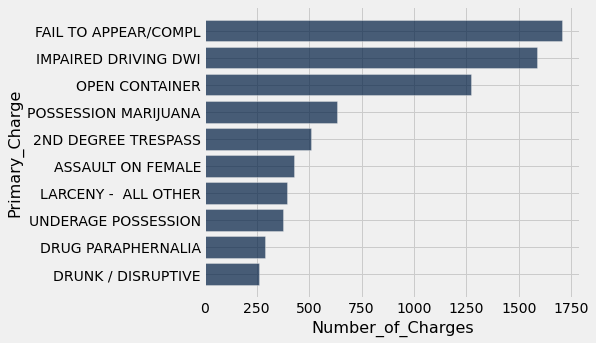

In [4]:
Primary_Charges.barh('Primary_Charge')

**Question 1.3.** Alcohol use seems to be prevelent in many of the 10 most seen charges. For the arrests with a primary charge of `OPEN CONTAINER`, construct a histogram for the ages of those arrested. Your histogram should begin at the age of 18, have bins 3 years wide, and range over all possible ages in the data.

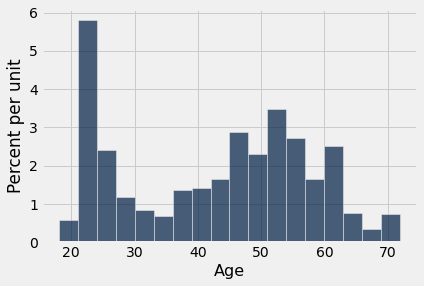

In [16]:
Arrests.where('Primary_Charge', 'OPEN CONTAINER').hist('Age', bins = np.arange(18, 75, 3))

**Question 1.4.** What can you learn from this histogram? Specifically describe two features of the histogram and discuss what age groups seem to be most often arrested with open container as the primary charge.

*The largest proportion of Open Container charges are among people in their early 20s. This decreases for people in their 30s, but increases afterwards and peaks around the early 50s. People in their late 60s appear to have the lowest proportion of Open Container charges.*

**Question 1.5.** Is there a relationship between the average age for arrests depending on the type of arrest and if drugs or alcohol are present? 

To answer this question, make a table, `Arrest_types_drugs_or_alcohol`,  containing types of arrest as the rows, and the presence of drugs or alcohol as the columns. The values in the rows should correspond to the average age of those arrested for each combination of categories. Remove the rows with the `Drugs_or_Alcohol_Present` values of nan (blank) or *U* (unknown) as well as the column with the *Type_of_Arrest* value nan (blank).  

Hint: Run the cell below with the table `Arrest_NoBlanks` and use this table to construct the required table for this question. In the Arrests table there are many blank values for the age of those arrested. These blanks may lead to issues when attempting this question. Also dropped is the *Y* column for lattitude, as it may cause confusion for some possible outputs.

Note: Depending on how you go about answering this question, you may encounter a red box appearing below your code cell with a warning message. Don't worry too much about the message. Warnings are raised by Python when it encounters an unusual condition in your code, but the condition is not severe enough to warrant throwing an error.

In [19]:
Arrests_NoBlanks = Table.read_table('Police_Arrests_Made.csv').where("Age", are.above_or_equal_to(18)).drop('Y')

In [24]:
Arrest_types_drugs_or_alcohol = Arrests_NoBlanks.pivot('Drugs_or_Alcohol_Present', 'Type_of_Arrest', 'Age', np.mean).drop('nan').take(0, 1, 2)
Arrest_types_drugs_or_alcohol

Type_of_Arrest,N,U,Y
ON VIEW,31.9345,31.8174,33.2515
SUMMONED/CITED,34.6424,37.151,35.8315
TAKEN INTO CUSTODY (WARRANT/LP),33.8126,36.1218,39.844


**Question 1.6.** What does the `Arrest_types_drugs_or_alcohol` table tell you about the relationship between the average age for arrests depending on the type of arrest and if drugs or alcohol are present?

*Write your answer here, replacing this text.*

## 2. Bicycle Crashes in Chapel Hill

Dr. McLean lives not far from campus and is considering commuting from home to Hanes Hall on his bicycle. First he decicdes that he needs to investigate if it's safe to ride in Chapel Hill. Chapel Hill Open data provides a data set of all bicycle crashes reported in North Carolina (12,173 of them!) that occurred between 2007 and 2019. Begin by importing the dataset in the cell below.

In [25]:
Bike = bike = Table.read_table('NCDOT_BikePedCrash.csv')
bike.show(5)

X,Y,OBJECTID_1,AmbulanceR,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,BikeSex,City,County,CrashAlcoh,CrashDay,CrashGrp,CrashHour,CrashID,CrashLoc,CrashMonth,CrashSevr,CrashType,CrashYear,Developmen,DrvrAge,DrvrAgeGrp,DrvrAlcDrg,DrvrAlcFlg,DrvrInjury,DrvrRace,DrvrSex,DrvrVehTyp,HitRun,Latitude,LightCond,Locality,Longitude,NumBicsAin,NumBicsBin,NumBicsCin,NumBicsKil,NumBicsNoi,NumBicsTot,NumBicsUin,NumLanes,NumUnits,RdCharacte,RdClass,RdConditio,RdConfig,RdDefects,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,OBJECTID
-78.8839,36.0395,1,Yes,11,11-15,.,No,With Traffic,B: Suspected Minor Injury,Sidewalk / Crosswalk / Driveway Crossing,Black,Male,Durham,Durham,No,Tuesday,Parallel Paths - Other Circumstances,16,101878313,Non-Intersection,January,B: Suspected Minor Injury,Bicyclist Ride Out - Parallel Path,2007,Residential,35,30-39,.,No,O: No Injury,White,Male,Passenger Car,No,36.0395,Daylight,Urban (>70% Developed),-78.8839,.,.,.,.,.,.,.,1 lane,2,Straight - Level,Local Street,Dry,"Two-Way, Divided, Unprotected Median",None,No Special Feature,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,No Control Present,Clear,No,1
-78.7828,35.7511,2,Yes,20,20-24,.,No,Facing Traffic,C: Possible Injury,Sidewalk / Crosswalk / Driveway Crossing,Hispanic,Male,Cary,Wake,No,Friday,Motorist Failed to Yield - Signalized Intersection,9,101885911,Intersection,January,C: Possible Injury,Motorist Drive Out - Right Turn on Red,2007,Residential,64,60-69,.,No,O: No Injury,White,Male,Passenger Car,No,35.7511,Daylight,Urban (>70% Developed),-78.7828,.,.,.,.,.,.,.,3 lanes,2,Straight - Grade,Local Street,Dry,"Two-Way, Divided, Unprotected Median",None,Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No,2
-80.6978,35.0847,3,Yes,37,30-39,.,No,Unknown,B: Suspected Minor Injury,Non-Roadway,Black,Male,Stallings,Union,No,Monday,Non-Roadway,17,101886055,Non-Roadway,January,B: Suspected Minor Injury,Non-Roadway,2007,Commercial,39,30-39,.,No,O: No Injury,White,Female,Passenger Car,No,35.0847,Dusk,Urban (>70% Developed),-80.6978,.,.,.,.,.,.,.,2 lanes,2,Straight - Level,Public Vehicular Area,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,No Control Present,Cloudy,No,3
-80.4793,35.6844,4,Yes,30,30-39,.,No,With Traffic,C: Possible Injury,Travel Lane,White,Male,Salisbury,Rowan,No,Friday,Motorist Left Turn / Merge,17,101890155,Intersection,January,C: Possible Injury,Motorist Left Turn - Opposite Direction,2007,Commercial,999,Unknown,.,No,Unknown Injury,Unknown/Missing,Unknown,Sport Utility,Yes,35.6844,Daylight,Urban (>70% Developed),-80.4793,.,.,.,.,.,.,.,2 lanes,2,Straight - Grade,Local Street,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,No Control Present,Cloudy,No,4
-78.9045,34.9994,5,Yes,45,40-49,.,No,With Traffic,B: Suspected Minor Injury,Travel Lane,Black,Male,Fayetteville,Cumberland,No,Friday,Motorist Overtaking Bicyclist,12,101899756,Non-Intersection,January,B: Suspected Minor Injury,Motorist Overtaking - Bicyclist Swerved,2007,Commercial,51,50-59,.,No,O: No Injury,Black,Female,Van,No,34.9994,Daylight,Urban (>70% Developed),-78.9044,.,.,.,.,.,.,.,2 lanes,2,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,No Special Feature,Coarse Asphalt,Coastal,Urban,30 - 35 MPH,"Double Yellow Line, No Passing Zone",Clear,No,5


**Question 2.1** Construct a new table `Bike_CH` that contains only the crashes that occurred in `Chapel Hill`. 

In [26]:
Bike_CH = Bike.where('City', 'Chapel Hill')
Bike_CH

X,Y,OBJECTID_1,AmbulanceR,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,BikeSex,City,County,CrashAlcoh,CrashDay,CrashGrp,CrashHour,CrashID,CrashLoc,CrashMonth,CrashSevr,CrashType,CrashYear,Developmen,DrvrAge,DrvrAgeGrp,DrvrAlcDrg,DrvrAlcFlg,DrvrInjury,DrvrRace,DrvrSex,DrvrVehTyp,HitRun,Latitude,LightCond,Locality,Longitude,NumBicsAin,NumBicsBin,NumBicsCin,NumBicsKil,NumBicsNoi,NumBicsTot,NumBicsUin,NumLanes,NumUnits,RdCharacte,RdClass,RdConditio,RdConfig,RdDefects,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,OBJECTID
-79.059,35.9183,284,Yes,12,11-15,.,No,Unknown,B: Suspected Minor Injury,Travel Lane,Black,Male,Chapel Hill,Orange,No,Saturday,Bicyclist Failed to Yield - Sign-Controlled Intersection,16,102031450,Intersection,May,B: Suspected Minor Injury,Bicyclist Ride Through - Sign-Controlled Intersection,2007,Residential,22,20-24,.,No,O: No Injury,White,Male,Passenger Car,No,35.9183,Daylight,Urban (>70% Developed),-79.059,.,.,.,.,.,.,.,2 lanes,2,Straight - Grade,Local Street,Dry,"Two-Way, Not Divided",None,T-Intersection,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,Stop Sign,Cloudy,No,284
-79.048,35.916,372,No,22,20-24,.,Yes,With Traffic,C: Possible Injury,Travel Lane,Unknown/Missing,Male,Chapel Hill,Orange,Yes,Thursday,Motorist Failed to Yield - Sign-Controlled Intersection,23,102054187,Intersection,May,C: Possible Injury,Motorist Drive Out - Sign-Controlled Intersection,2007,Residential,48,40-49,.,No,O: No Injury,Black,Male,Sport Utility,No,35.916,Dark - Roadway Not Lighted,Urban (>70% Developed),-79.048,.,.,.,.,.,.,.,4 lanes,2,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,Stop Sign,Clear,No,372
-79.0551,35.9052,519,Yes,34,30-39,.,No,Facing Traffic,C: Possible Injury,Travel Lane,Asian,Male,Chapel Hill,Orange,No,Tuesday,Loss of Control / Turning Error,17,102085660,Intersection,July,C: Possible Injury,Bicyclist Turning Error - Left Turn,2007,Residential,39,30-39,.,No,O: No Injury,White,Male,Passenger Car,No,35.9052,Daylight,Urban (>70% Developed),-79.0551,.,.,.,.,.,.,.,2 lanes,2,Straight - Level,Local Street,Wet,"Two-Way, Not Divided",None,T-Intersection,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,Stop Sign,Rain,No,519
-79.0562,35.9099,763,No,53,50-59,.,No,With Traffic,C: Possible Injury,Unknown,White,Male,Chapel Hill,Orange,No,Wednesday,Motorist Left Turn / Merge,8,102136520,Non-Intersection,September,C: Possible Injury,Motorist Left Turn - Opposite Direction,2007,Residential,34,30-39,.,No,O: No Injury,White,Male,Passenger Car,No,35.9099,Daylight,Urban (>70% Developed),-79.0562,.,.,.,.,.,.,.,2 lanes,2,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,No Control Present,Clear,No,763
-79.0342,35.9292,824,Yes,18,16-19,.,No,With Traffic,B: Suspected Minor Injury,Unknown,White,Male,Chapel Hill,Orange,No,Saturday,Bicyclist Failed to Yield - Signalized Intersection,14,102152366,Intersection,September,B: Suspected Minor Injury,Bicyclist Ride Out - Signalized Intersection,2007,Commercial,68,60-69,.,No,O: No Injury,White,Female,Passenger Car,No,35.9293,Daylight,Urban (>70% Developed),-79.0342,.,.,.,.,.,.,.,9 or more lanes,2,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No,824
-79.048,35.905,980,Yes,21,20-24,.,No,Unknown,B: Suspected Minor Injury,Multi-use Path,White,Male,Chapel Hill,Orange,No,Tuesday,Non-Roadway,18,102208751,Non-Roadway,December,B: Suspected Minor Injury,Non-Roadway,2007,Institutional,38,30-39,.,No,O: No Injury,Asian,Male,Passenger Car,No,35.9051,Dark - Lighted Roadway,Urban (>70% Developed),-79.048,.,.,.,.,.,.,.,1 lane,2,Straight - Grade,Public Vehicular Area,Dry,"One-Way, Not Divided",None,No Special Feature,Coarse Asphalt,Piedmont,Urban,5 - 15 MPH,No Control Present,Clear,No,980
-79.0644,35.8916,1085,No,43,40

**Question 2.2** Use the `Bike_CH` table to determine the average number of reported bicycle crashes per year in Chapel Hill and assign this value to `ave_per_year`.

In [32]:
ave_per_year = np.mean(Bike_CH.group('CrashYear').column('count'))
ave_per_year

11.923076923076923

Of the reported bicycle crashes that occurred in Chapel Hill, what proportion of them occurred within 0.5 miles of Dr. McLean's office in Hanes Hall? Answering this question will take a few steps. Since the longitude (`X`) and latitude (`Y`) of each bicycle crash is listed in the table, we can use those to determine a distance from Hanes Hall. Googlemaps reports that the longitude and lattide of Hanes Hall is (-79.0513, 35.9107). To convert the differences in these latitudes and longitudes from Hanes Hall, we'll need to use Haversine's Formula.

### 2.1 Haversine Formula

It might seem straightforward to pull out a map and measure the distance between two distant points, however, the larger the distance the bigger the distortion caused by traveling on the curved surface of the Earth as opposed to flat 2D space. So while the distance you measure to your neighbouring town won't be too bad, if you're measuring between London and Rio the curvature of the Earth will make a big difference to the distance that you'll travel. To help figure out the correct distance there's the haversine formula.

The haversine formula allows you to calculate the shortest distance between two points on a sphere using their latitudes and longitudes — this will be the arc between them on the great circle that includes both points. A great circle is a circle on a sphere with the same center as the sphere, like the Equator. The haversine formula isn't perfect in practice, as Earth isn't a perfect sphere

https://sketchplanations.com/the-haversine-formula

<img src="haversine.png"/>

The formula itself is a bit complicated, so it's written for you in the cell below. The arguments are the latitude and longitudes of two points on earth, with the function returning the distance between them in kilometers. Run the cell below.

In [33]:
from math import radians, cos, sin, asin, sqrt
def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    km = 6367 * c
    return km

**Question 2.1.1.** Use the haversine formula to determine the distance in kilometers for the first bicycle crash in the `Bike_CH` table and Hanes Hall. Assign this value to `First_Crash_Distance`.

In [36]:
First_Crash_Distance = haversine(Bike_CH.column('X').item(0), Bike_CH.column('Y').item(0), -79.0513, 35.9107)
First_Crash_Distance

1.0871866784104223

**Question 2.1.2.** Next you will determine the distance of each bicycle crash in the `Bike_CH` table from Hanes Hall. Begin by creating a table `Bike_CH_with_Hanes` that contains the same rows and columns as `Bike_NC`, and adds two new columns: `X Hanes` and `Y Hanes`. These columns will have the values for the longitude of Hanes Hall (`X Hanes`) and latitude of Hanes Hall (`Y Hanes`) repeated for each row of the column. To do this, you can use the np.repeat() function from numpy. This function takes in two arguments, first the values that you want to repeat, and then how many times you want to repeat it. For instance in the cell below an array is creating by repeating 0 20 times.

In [37]:
np.repeat(0, 20)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [39]:
Bike_CH_with_Hanes = Bike_CH.with_columns(
    'X Hanes', np.repeat(-79.0513, Bike_CH.num_rows),
    'Y Hanes', np.repeat(35.9107, Bike_CH.num_rows)
)
Bike_CH_with_Hanes

X,Y,OBJECTID_1,AmbulanceR,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,BikeSex,City,County,CrashAlcoh,CrashDay,CrashGrp,CrashHour,CrashID,CrashLoc,CrashMonth,CrashSevr,CrashType,CrashYear,Developmen,DrvrAge,DrvrAgeGrp,DrvrAlcDrg,DrvrAlcFlg,DrvrInjury,DrvrRace,DrvrSex,DrvrVehTyp,HitRun,Latitude,LightCond,Locality,Longitude,NumBicsAin,NumBicsBin,NumBicsCin,NumBicsKil,NumBicsNoi,NumBicsTot,NumBicsUin,NumLanes,NumUnits,RdCharacte,RdClass,RdConditio,RdConfig,RdDefects,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,OBJECTID,X Hanes,Y Hanes
-79.059,35.9183,284,Yes,12,11-15,.,No,Unknown,B: Suspected Minor Injury,Travel Lane,Black,Male,Chapel Hill,Orange,No,Saturday,Bicyclist Failed to Yield - Sign-Controlled Intersection,16,102031450,Intersection,May,B: Suspected Minor Injury,Bicyclist Ride Through - Sign-Controlled Intersection,2007,Residential,22,20-24,.,No,O: No Injury,White,Male,Passenger Car,No,35.9183,Daylight,Urban (>70% Developed),-79.059,.,.,.,.,.,.,.,2 lanes,2,Straight - Grade,Local Street,Dry,"Two-Way, Not Divided",None,T-Intersection,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,Stop Sign,Cloudy,No,284,-79.0513,35.9107
-79.048,35.916,372,No,22,20-24,.,Yes,With Traffic,C: Possible Injury,Travel Lane,Unknown/Missing,Male,Chapel Hill,Orange,Yes,Thursday,Motorist Failed to Yield - Sign-Controlled Intersection,23,102054187,Intersection,May,C: Possible Injury,Motorist Drive Out - Sign-Controlled Intersection,2007,Residential,48,40-49,.,No,O: No Injury,Black,Male,Sport Utility,No,35.916,Dark - Roadway Not Lighted,Urban (>70% Developed),-79.048,.,.,.,.,.,.,.,4 lanes,2,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,Stop Sign,Clear,No,372,-79.0513,35.9107
-79.0551,35.9052,519,Yes,34,30-39,.,No,Facing Traffic,C: Possible Injury,Travel Lane,Asian,Male,Chapel Hill,Orange,No,Tuesday,Loss of Control / Turning Error,17,102085660,Intersection,July,C: Possible Injury,Bicyclist Turning Error - Left Turn,2007,Residential,39,30-39,.,No,O: No Injury,White,Male,Passenger Car,No,35.9052,Daylight,Urban (>70% Developed),-79.0551,.,.,.,.,.,.,.,2 lanes,2,Straight - Level,Local Street,Wet,"Two-Way, Not Divided",None,T-Intersection,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,Stop Sign,Rain,No,519,-79.0513,35.9107
-79.0562,35.9099,763,No,53,50-59,.,No,With Traffic,C: Possible Injury,Unknown,White,Male,Chapel Hill,Orange,No,Wednesday,Motorist Left Turn / Merge,8,102136520,Non-Intersection,September,C: Possible Injury,Motorist Left Turn - Opposite Direction,2007,Residential,34,30-39,.,No,O: No Injury,White,Male,Passenger Car,No,35.9099,Daylight,Urban (>70% Developed),-79.0562,.,.,.,.,.,.,.,2 lanes,2,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,No Control Present,Clear,No,763,-79.0513,35.9107
-79.0342,35.9292,824,Yes,18,16-19,.,No,With Traffic,B: Suspected Minor Injury,Unknown,White,Male,Chapel Hill,Orange,No,Saturday,Bicyclist Failed to Yield - Signalized Intersection,14,102152366,Intersection,September,B: Suspected Minor Injury,Bicyclist Ride Out - Signalized Intersection,2007,Commercial,68,60-69,.,No,O: No Injury,White,Female,Passenger Car,No,35.9293,Daylight,Urban (>70% Developed),-79.0342,.,.,.,.,.,.,.,9 or more lanes,2,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No,824,-79.0513,35.9107
-79.048,35.905,980,Yes,21,20-24,.,No,Unknown,B: Suspected Minor Injury,Multi-use Path,White,Male,Chapel Hill,Orange,No,Tuesday,Non-Roadway,18,102208751,Non-Roadway,December,B: Suspected Minor Injury,Non-Roadway,2007,Institutional,38,30-39,.,No,O: No Injury,Asian,Male,Passenger Car,No,35.9051,Dark - Lighted Roadway,Urban (>70% Developed),-79.048,.,.,.,.,.,.,.,1 lane,2,Straight - Grade,Public Vehicular Area,Dry,"One-Way, Not Divided",None,No Special Feature,Co

**Question 2.1.3.** Next you will use the `apply` function to determine the distances of each bicycle crash from Hanes Hall. Create a new table `Bike_CH_Dist_From_Hanes` which contains the same columns and rows as `Bike_CH_with_Hanes` as well as a new column `Distance From Hanes` which contains the values in kilometers for the distance from each bicycle accident from Hanes Hall. 

In [41]:
Bike_CH_Dist_From_Hanes =  Bike_CH_with_Hanes.with_column(
    'Distance From Hanes', Bike_CH_with_Hanes.apply(haversine, 'X', 'Y', 'X Hanes', 'Y Hanes'))
Bike_CH_Dist_From_Hanes

X,Y,OBJECTID_1,AmbulanceR,BikeAge,BikeAgeGrp,BikeAlcDrg,BikeAlcFlg,BikeDir,BikeInjury,BikePos,BikeRace,BikeSex,City,County,CrashAlcoh,CrashDay,CrashGrp,CrashHour,CrashID,CrashLoc,CrashMonth,CrashSevr,CrashType,CrashYear,Developmen,DrvrAge,DrvrAgeGrp,DrvrAlcDrg,DrvrAlcFlg,DrvrInjury,DrvrRace,DrvrSex,DrvrVehTyp,HitRun,Latitude,LightCond,Locality,Longitude,NumBicsAin,NumBicsBin,NumBicsCin,NumBicsKil,NumBicsNoi,NumBicsTot,NumBicsUin,NumLanes,NumUnits,RdCharacte,RdClass,RdConditio,RdConfig,RdDefects,RdFeature,RdSurface,Region,RuralUrban,SpeedLimit,TraffCntrl,Weather,Workzone,OBJECTID,X Hanes,Y Hanes,Distance From Hanes
-79.059,35.9183,284,Yes,12,11-15,.,No,Unknown,B: Suspected Minor Injury,Travel Lane,Black,Male,Chapel Hill,Orange,No,Saturday,Bicyclist Failed to Yield - Sign-Controlled Intersection,16,102031450,Intersection,May,B: Suspected Minor Injury,Bicyclist Ride Through - Sign-Controlled Intersection,2007,Residential,22,20-24,.,No,O: No Injury,White,Male,Passenger Car,No,35.9183,Daylight,Urban (>70% Developed),-79.059,.,.,.,.,.,.,.,2 lanes,2,Straight - Grade,Local Street,Dry,"Two-Way, Not Divided",None,T-Intersection,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,Stop Sign,Cloudy,No,284,-79.0513,35.9107,1.08719
-79.048,35.916,372,No,22,20-24,.,Yes,With Traffic,C: Possible Injury,Travel Lane,Unknown/Missing,Male,Chapel Hill,Orange,Yes,Thursday,Motorist Failed to Yield - Sign-Controlled Intersection,23,102054187,Intersection,May,C: Possible Injury,Motorist Drive Out - Sign-Controlled Intersection,2007,Residential,48,40-49,.,No,O: No Injury,Black,Male,Sport Utility,No,35.916,Dark - Roadway Not Lighted,Urban (>70% Developed),-79.048,.,.,.,.,.,.,.,4 lanes,2,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,Stop Sign,Clear,No,372,-79.0513,35.9107,0.664417
-79.0551,35.9052,519,Yes,34,30-39,.,No,Facing Traffic,C: Possible Injury,Travel Lane,Asian,Male,Chapel Hill,Orange,No,Tuesday,Loss of Control / Turning Error,17,102085660,Intersection,July,C: Possible Injury,Bicyclist Turning Error - Left Turn,2007,Residential,39,30-39,.,No,O: No Injury,White,Male,Passenger Car,No,35.9052,Daylight,Urban (>70% Developed),-79.0551,.,.,.,.,.,.,.,2 lanes,2,Straight - Level,Local Street,Wet,"Two-Way, Not Divided",None,T-Intersection,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,Stop Sign,Rain,No,519,-79.0513,35.9107,0.701111
-79.0562,35.9099,763,No,53,50-59,.,No,With Traffic,C: Possible Injury,Unknown,White,Male,Chapel Hill,Orange,No,Wednesday,Motorist Left Turn / Merge,8,102136520,Non-Intersection,September,C: Possible Injury,Motorist Left Turn - Opposite Direction,2007,Residential,34,30-39,.,No,O: No Injury,White,Male,Passenger Car,No,35.9099,Daylight,Urban (>70% Developed),-79.0562,.,.,.,.,.,.,.,2 lanes,2,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,No Special Feature,Smooth Asphalt,Piedmont,Urban,20 - 25 MPH,No Control Present,Clear,No,763,-79.0513,35.9107,0.450427
-79.0342,35.9292,824,Yes,18,16-19,.,No,With Traffic,B: Suspected Minor Injury,Unknown,White,Male,Chapel Hill,Orange,No,Saturday,Bicyclist Failed to Yield - Signalized Intersection,14,102152366,Intersection,September,B: Suspected Minor Injury,Bicyclist Ride Out - Signalized Intersection,2007,Commercial,68,60-69,.,No,O: No Injury,White,Female,Passenger Car,No,35.9293,Daylight,Urban (>70% Developed),-79.0342,.,.,.,.,.,.,.,9 or more lanes,2,Straight - Level,Local Street,Dry,"Two-Way, Not Divided",None,Four-Way Intersection,Smooth Asphalt,Piedmont,Urban,30 - 35 MPH,Stop And Go Signal,Clear,No,824,-79.0513,35.9107,2.57405
-79.048,35.905,980,Yes,21,20-24,.,No,Unknown,B: Suspected Minor Injury,Multi-use Path,White,Male,Chapel Hill,Orange,No,Tuesday,Non-Roadway,18,102208751,Non-Roadway,December,B: Suspected Minor Injury,Non-Roadway,2007,Institutional,38,30-39,.,No,O: No Injury,Asian,Male,Passenger Car,No,35.9051,Dark - Lighted Roadway,Urban (>70% Developed),-79.048,.,.,.,.,.,.,.,1 lane,2,Straight - Grade,Public Vehic

**Question 2.1.4** What proportion of the accidents in the `Bike_CH_with_Hanes` table are within 0.5 miles of Hanes Hall? Note that the haversine function calculates the distance in kilometers. One kilometer is approximately 0.621371 miles. Assign this value to `Prop_within_half_mile`.

In [43]:
Prop_within_half_mile = Bike_CH_Dist_From_Hanes.where('Distance From Hanes', are.below_or_equal_to(0.5 / 0.621371)).num_rows / Bike_CH_Dist_From_Hanes.num_rows
Prop_within_half_mile

0.3870967741935484

Congratulations, you're done with lab 4!